In [19]:
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import folium
import seaborn as sb
from IPython.display import HTML


# Enable inline plotting
%matplotlib inline

#### Create a dataframe from data in train.csv

In [20]:
train_path = r'../../data/train.csv'
train = pd.read_csv(train_path)

# Task 1: Data Exploration

### Query 1.1

,Counts,id,name,description,transit,host_since,host_response_rate,host_has_profile_pic,host_identity_verified,neighbourhood,...,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,month,room_type
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,24765,24765,24744,24566,17454,24763,20838,24763,24763,24545,...,24765,24765,24765,19632,19632,19479,24765,24765,24765,Entire home/apt
Private room,3223,3223,3214,3134,1689,3223,2129,3223,3223,3183,...,3223,3223,3223,1679,1679,1637,3223,3223,3223,Private room
Shared room,134,134,134,133,69,134,100,134,134,133,...,134,134,134,89,89,89,134,134,134,Shared room


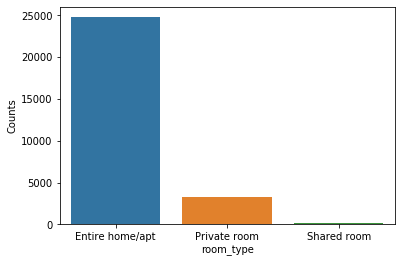

In [21]:
q1 = train.groupby(['room_type']).count().sort_values(by='id', ascending=False)
q1 = q1.rename(columns={q1.columns[0]: 'Counts'})
q1['room_type'] = q1.index
sb.barplot(x='room_type', y=q1.columns[0], data = q1)
q1

In [22]:
q1.head(n=1).filter(items=[])

""
room_type
Entire home/apt


### Query 1.2

,price,month
month,,
02_February,65.497912,02_February
03_March,64.894456,03_March
04_April,64.363730,04_April


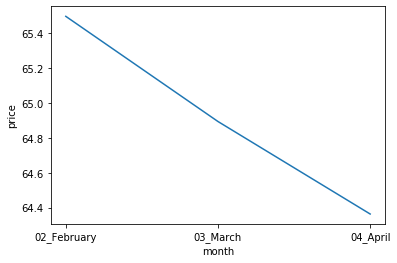

In [35]:
q2 = train.groupby(['month']).mean().filter(items=['price'])
q2['month'] = q2.index
sb.lineplot(x='month', y=q2.columns[0], data = q2)
q2

### Query 1.3

,number_of_reviews,neighbourhood
neighbourhood,,
Plaka,132361,Plaka
Koukaki,90357,Koukaki
Neos Kosmos,83348,Neos Kosmos
Psyri,54353,Psyri
Metaxourgeio,44792,Metaxourgeio


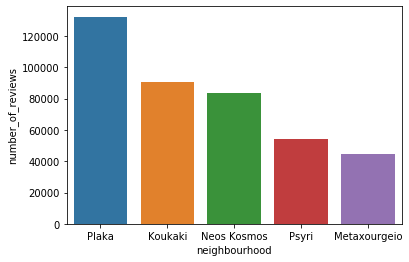

In [24]:
q3 = train.groupby(['neighbourhood']).sum()
q3 = q3.sort_values('number_of_reviews', ascending = False)
q3 = q3.head(5).filter(items=['number_of_reviews'])
q3['neighbourhood'] = q3.index
sb.barplot(x='neighbourhood', y=q3.columns[0], data = q3)
q3

### Query 1.4

""
neighbourhood
Plaka


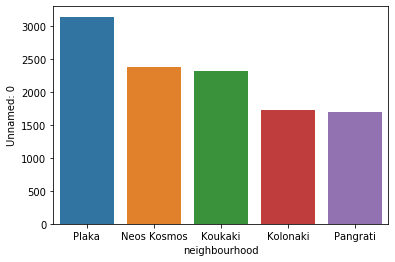

In [25]:
q4 = train.groupby(['neighbourhood']).count()
q4 = q4.sort_values(['id'], ascending = False).head(5)
q4['neighbourhood'] = q4.index
sb.barplot(x='neighbourhood', y=q4.columns[0], data = q4)
q4.head(1).filter(items=[])

### Query 1.5

##### By neighbourhood

In [26]:
q5_neigh = train.groupby(['neighbourhood']).count()
q5_neigh = q5_neigh.rename(columns={'id': 'count'})
q5_neigh = q5_neigh.filter(items=['neighbourhood','count'])
# q5_neigh['neighbourhood'] = q5_neigh.index
# sb.swarmplot(y=q5_neigh.columns[0], data = q5_neigh)
q5_neigh


,count
neighbourhood,
Agios Loukas,209
Agios Nikolaos,611
Akadimia Platonos,114
Ambelokipi,1482
Attiki,758
Exarcheia,1330
Gazi,282
Goudi,87
Ilisia,502


##### By month

,count,month
month,,
02_February,9100,02_February
03_March,9361,03_March
04_April,9661,04_April


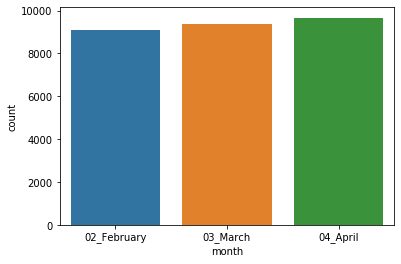

In [27]:
q5_month = train.groupby(['month']).count()
q5_month = q5_month.rename(columns={'id': 'count'})
q5_month = q5_month.filter(items=['count'])
q5_month['month'] = q5_month.index
sb.barplot(x='month', y=q5_month.columns[0], data = q5_month)
q5_month

### Query 1.6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f114e193b90>]],
      dtype=object)

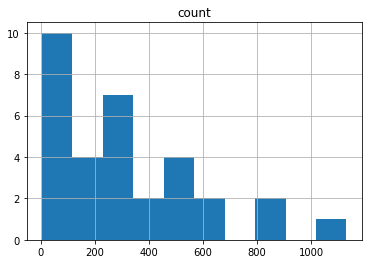

In [28]:
q6 = train.drop_duplicates(subset='id').groupby(['neighbourhood']).count()
q6 = q6.rename(columns = {'id':'count'})
q6.hist(column = 'count')

### Query 1.7

In [29]:
q7 = train.groupby(['neighbourhood','room_type']).count().sort_values('neighbourhood').groupby(level=0).head(1)
q7.filter(items='id')

,
neighbourhood,room_type
Agios Loukas,Entire home/apt
Agios Nikolaos,Entire home/apt
Akadimia Platonos,Entire home/apt
Ambelokipi,Shared room
Attiki,Entire home/apt
Exarcheia,Entire home/apt
Gazi,Entire home/apt
Goudi,Private room
Ilisia,Entire home/apt


### Query 1.8

,price,room_type
room_type,,
Private room,80.300031,Private room


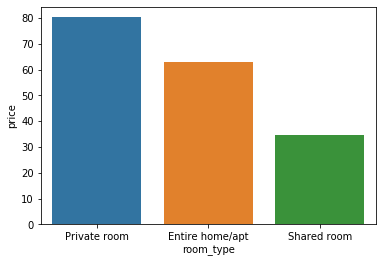

In [30]:
q8 = train.groupby(['room_type']).mean()
q8 = q8.sort_values(['price'], ascending=False)
q8 = q8.filter(items=['price'])
q8['room_type'] = q8.index
sb.barplot(x='room_type', y=q8.columns[0], data = q8)
q8.head(1)

### Query 1.9

In [31]:
map = folium.Map(location = [37.983810, 23.727539], zoom_start=13)
#map

In [32]:
q9 = train[train.month == '04_April'].filter(items=['name', 'description', 'neighbourhood', 'latitude','longitude', 'room_type', 'price'])
q9 = q9.sample(1000, random_state=30)

for index, row in q9.iterrows():
    pop = row['room_type'] + ' ' + '$' +  str(row['price'])
    folium.Marker([row['latitude'], row['longitude']], popup=pop, tooltip = row['name']).add_to(map)

map

In [33]:
#map.save('april_listings.html')

In [34]:
#HTML(filename='april_listings.html')